In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

So now we now have our scaled data as scaled_X but it is still 30 features.

We have to reduce this dimension down.

We'll use decomposition from PCA.

In [6]:
from sklearn.decomposition import PCA

In [10]:
#help(PCA)

So we only need to care about one hyperparameter in this, n_components, i.e. how many features we want to reduce down to.

We'll use n_components = 2.

In [11]:
pca_model = PCA(n_components=2)

We could directly use fit_transform or fit and tranform seperately.
1. fit - Is the one calculating the eigenvalues and eigenvectors and the covariance matrix.
2. transform - Is the one that actually does that projection on to these formed principal components, in our case 2 PC, that DOT product.

In [12]:
pca_model.fit(scaled_X)

PCA(n_components=2)

In [13]:
pca_model.transform(scaled_X)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [15]:
pc_results = pca_model.fit_transform(scaled_X)
pc_results

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [42]:
pc_results[:,0]

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.34237919,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816123, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856285,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.90223611,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

In [43]:
pc_results[:,0].shape

(569,)

In [45]:
pc_results[:,1]

array([ 1.94858307e+00, -3.76817174e+00, -1.07517380e+00,  1.02755891e+01,
       -1.94807157e+00,  3.94992890e+00, -2.69003128e+00,  2.34024401e+00,
        3.39181295e+00,  7.72717407e+00, -2.65927550e+00,  6.65679266e-02,
        2.70097649e+00, -9.68279261e-01,  4.86108331e+00,  2.97706118e+00,
       -1.56475773e+00,  1.41867033e+00, -4.11433352e+00, -1.88214954e-01,
        5.72808193e-01,  1.66294990e+00,  3.30496373e+00, -5.12836651e+00,
       -1.54375229e+00,  2.01861034e+00,  2.17162512e+00, -1.87655235e+00,
        5.37242161e-01, -1.52370502e+00, -7.57177451e-01,  4.00529551e+00,
        3.37536154e-01, -1.13258891e+00,  7.58423243e-01, -3.54355942e-01,
        9.13196276e-01, -1.41347312e+00, -3.35129292e+00,  8.86243953e-01,
       -1.92399162e+00,  2.26075201e+00,  2.01867310e+00,  9.84930020e-01,
       -1.37099091e-01, -1.34876978e-01,  1.48422032e+00,  2.35227179e+00,
        9.58296095e-02, -1.20843321e+00, -1.28249558e+00, -1.68895860e+00,
       -4.98218714e-01, -

In [46]:
pc_results[:,1].shape

(569,)

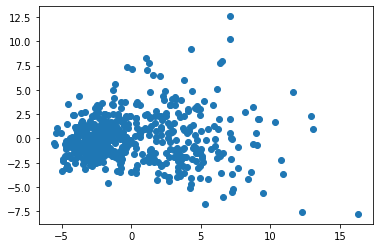

In [16]:
plt.scatter(pc_results[:,0],pc_results[:,1]);

Just like in the previous manual implementation, we'll colour it by the targets column from the cancer_dictionary.

In [18]:
from sklearn.datasets import load_breast_cancer
cancer_dictionary = load_breast_cancer()
cancer_dictionary.keys()
cancer_dictionary['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

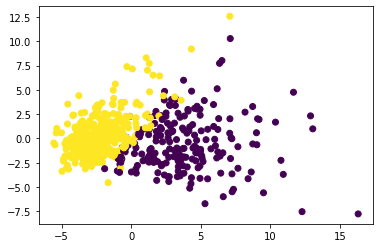

In [19]:
# Coloring by the targets data that we got above
plt.scatter(pc_results[:,0],pc_results[:,1],c=cancer_dictionary['target']);

So that's essentially the PCA process that we did manually.

Now Scikit learn has some really useful attributes and the 2 most ueful ones are the n_components and the variance explained/ explained variance ratio.

In [20]:
# So taking a looks at the model
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

It is explaining the principle axis in feature space.

So what this actually represents is the directions of maximum variance in the data and it's sorted based off the explained variance.

We can see that in a heatmap, not that intuitive but something we can further explore on.

In [22]:
df_comp = pd.DataFrame(pca_model.components_,index=['PC1','PC2'],columns=df.columns)

In [23]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


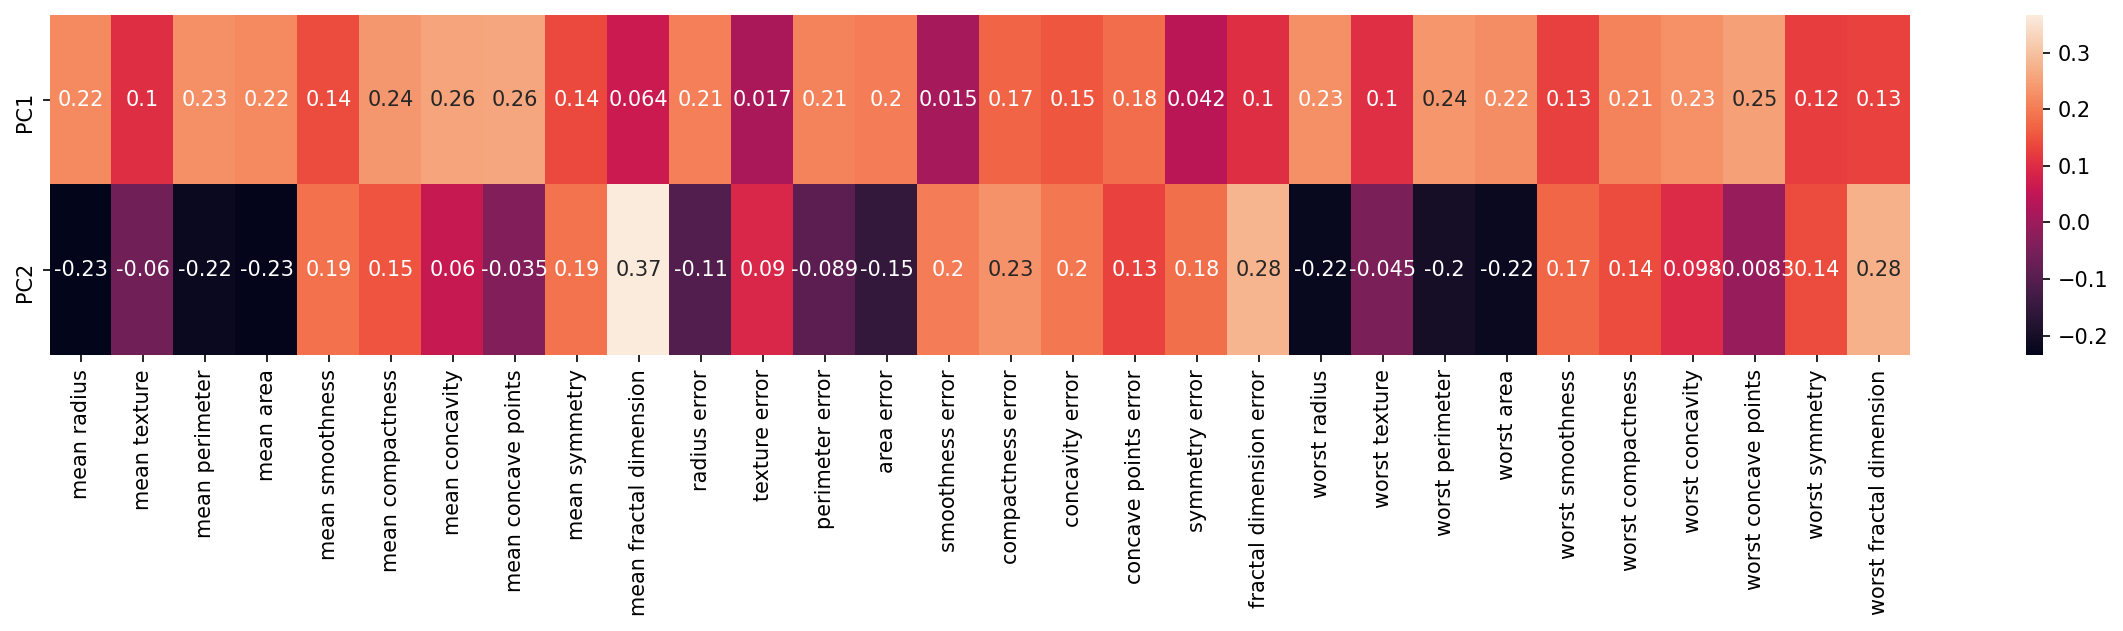

In [24]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True);

All right, so we have this heat map, again, the principal axis and feature space representing the directions of the maximum variance in the data.

Now, what's more useful is the explained variance ratio.

In [27]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

So the first principal component explains 44% of the variance in our data and the second principal componenet explains 18% of the varinace in our data.

In [28]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155944

### And together these two components are able to exlain 63% of the variance in the dataset.

But we still loose around 40% of the variance.

But if we take a look at the scatterplot even with 63% we are able to seperate out the classes quite well.

### So the question that arises is, as you increase the number of components for PCA, how does your explain variance begin to increase?

Let's do a pca model with 30 PC i.e. n_components = 30

In [29]:
pca_model30 = PCA(n_components=30)
pca_model30.fit(scaled_X)

PCA(n_components=30)

In [30]:
pca_model30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [31]:
np.sum(pca_model30.explained_variance_ratio_)

1.0

So it makes sense why we get 100% variance explained, because since we are taking taking in all the feaures and getting principal components for all of them we have all the varince explained by the model.

So going from a 30 dimensional feature space to 30 principal components, we're not actually reducing the data.

So we should have been able to explain 100 percent of that variance or 1.0.

In [34]:
explained_variance = []

for n in range(1,31):
    pca_model = PCA(n_components=n)
    pca_model.fit(scaled_X)
    
    explained_variance.append(np.sum(pca_model.explained_variance_ratio_))

In [35]:
explained_variance

[0.4427202560752632,
 0.6324320765155942,
 0.7263637090897409,
 0.7923850582440572,
 0.8473427431680474,
 0.8875879635563814,
 0.9100953006953885,
 0.92598253861421,
 0.9398790324284261,
 0.9515688143293605,
 0.9613660042091624,
 0.9700713832146957,
 0.978116633076616,
 0.983350290541703,
 0.9864881227109463,
 0.989150216061065,
 0.9911301840050238,
 0.9928841434552494,
 0.9945333965144744,
 0.9955720432628137,
 0.9965711397265141,
 0.9974857864775682,
 0.9982971477364667,
 0.998898981303139,
 0.9994150236823042,
 0.9996876116777816,
 0.9999176271402876,
 0.9999706050693258,
 0.9999955651725727,
 1.0]

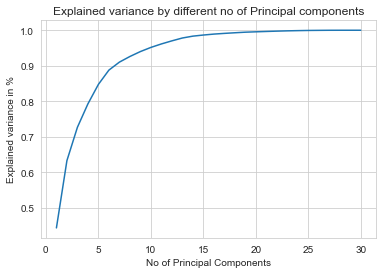

In [39]:
sns.set_style(style='whitegrid')
plt.plot(range(1,31),explained_variance)
plt.xlabel('No of Principal Components')
plt.ylabel('Explained variance in %')
plt.title('Explained variance by different no of Principal components');

We can see that as we increase the no of components/Principal components the exaplined varinace goes up.

We can see that even with 1 PC we start off pretty high from around 40%.

**SO we can see that after with 10 PC after this we are not adding much of explained varince**

So sometimes we plot like this to be able to choose the no of components.

So we use an elbow method like this to see and analyse the correct n_components.